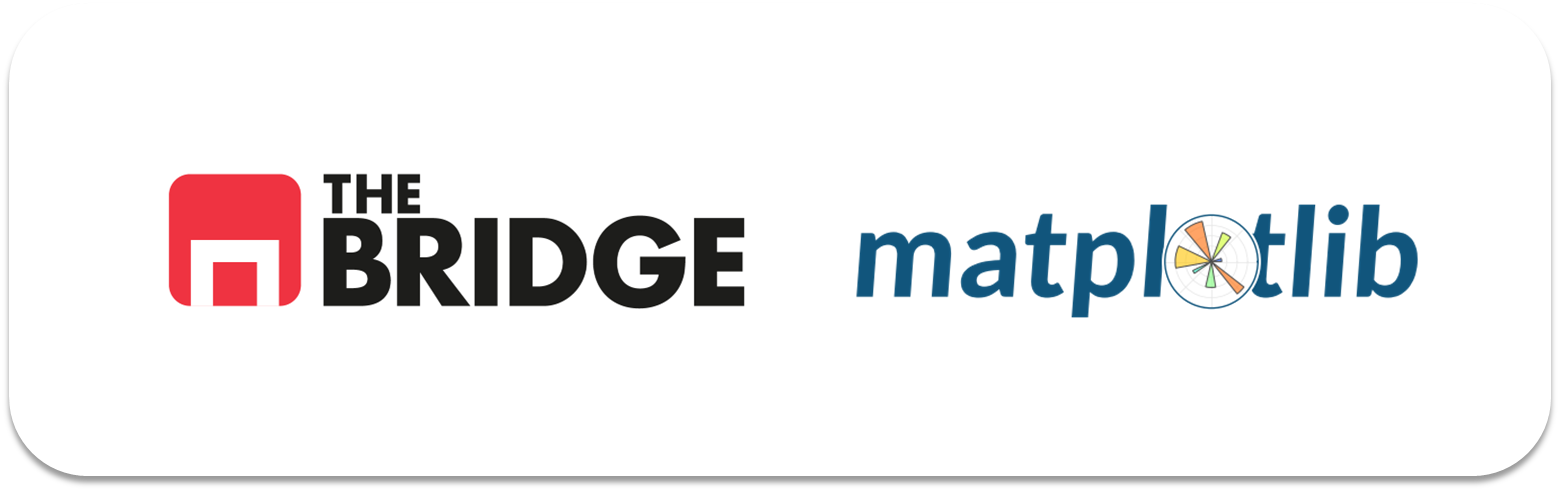

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.font_manager
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import seaborn as sns
matplotlib.font_manager.findfont("Bradley Hand ITC")

'C:\\Windows\\Fonts\\BRADHITC.TTF'

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [19]:
df = pd.read_csv("./california_cities.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [22]:
df = df.dropna() #me deshice de todos los nulos

In [23]:
#configuro el estilo
plt.style.use("seaborn-v0_8-whitegrid")

In [27]:
#le doy interactividad
%matplotlib inline

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

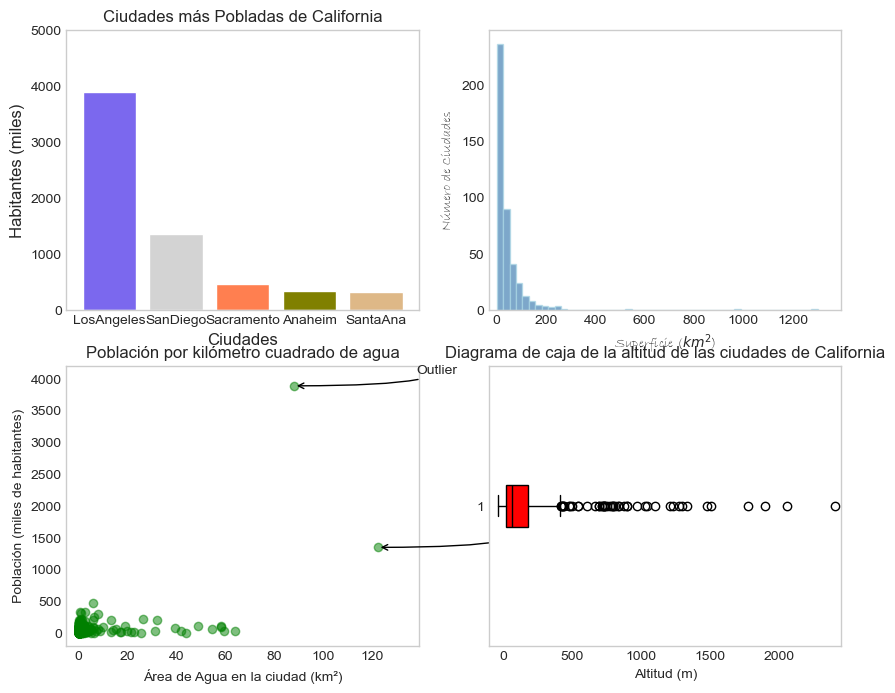

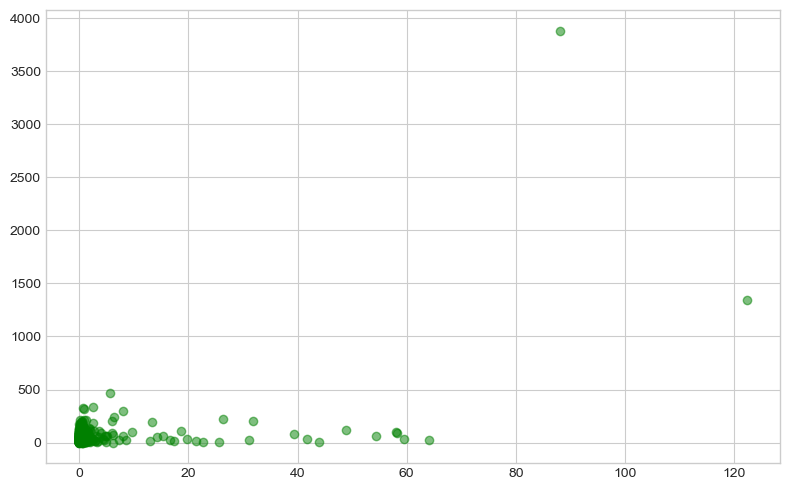

In [67]:
# Crear la figura con una grilla de 2x2
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) 
'--------------------------------------------------------------------------------------'
# 1. Gráfico de barras (posición (0, 0))
ax = axs[0, 0]
df_sorted = df.sort_values(by='population_total', ascending=False)
top_5_cities = df_sorted.head(5)
eje_x = top_5_cities['city']
eje_y = top_5_cities['population_total'] / 1000
ax.bar(eje_x, eje_y, 
       color=['mediumslateblue', 'lightgray', 'coral', 'olive', 'burlywood'], 
       edgecolor='white')
ax.set_title('Ciudades más Pobladas de California', size=12)
ax.set_ylabel('Habitantes (miles)', fontsize=12)
ax.set_ylim(0, 5000)
ax.set_xlabel('Ciudades', fontsize=12)
ax.grid(False)
'--------------------------------------------------------------------------------------'
# 2. Histograma (posición (0, 1))
ax = axs[0, 1]
area_data = df['area_total_km2']
ax.hist(area_data, bins=50, color='steelblue', edgecolor='lightblue', alpha=0.7)
ax.set_ylabel('Número de Ciudades', font='Bradley Hand ITC')
ax.set_xlabel('Superficie ($km^{2}$)', font='Bradley Hand ITC')
ax.set_xlim(-30, 1399)
ax.set_ylim(0, 249)
ax.grid(False)
'--------------------------------------------------------------------------------------'
# 3. Scatterplot (posición (1, 0))
ax = axs[1, 0]
plt.figure(figsize = (8,5))
plt.scatter(df["area_water_km2"],
            df["population_total"]/1000,
            alpha=0.5,
            color='g'
           )
x=df["area_water_km2"]
y=df["population_total"]/1000
outliers_x = df[df['population_total'] > 1000000].area_water_km2
outliers_y = df[df['population_total'] > 1000000].population_total / 1000
ax.scatter(x,y, color='g', alpha=0.5)
flecha = {"arrowstyle": "->", "connectionstyle": "angle3"}
for i, (ox, oy) in enumerate(zip(outliers_x, outliers_y)):
    ax.annotate(f"Outlier", xy=(ox, oy), xytext=(ox + 50, oy + 200), arrowprops=flecha)
ax.set_xlim(-5, 139)
ax.set_ylim(-200, 4200)
ax.set_xlabel('Área de Agua en la ciudad (km²)')
ax.set_ylabel('Población (miles de habitantes)')
ax.set_title('Población por kilómetro cuadrado de agua', size=12)
ax.grid(False)
'--------------------------------------------------------------------------------------'
# 4. Boxplot (posición (1, 1))
ax = axs[1, 1]
altitud = df['elevation_m']
ax.boxplot(altitud, whis=1.5, vert=False, sym='o', patch_artist=True,
           boxprops={'color': 'black', 'facecolor': 'red'},
           whiskerprops={'color': 'black'},
           flierprops={'color': 'black'},
           medianprops={'color': 'black'})
ax.set_title('Diagrama de caja de la altitud de las ciudades de California', size=12)
ax.set_xlabel('Altitud (m)')
ax.set_xlim(-100, max(altitud) + 50)
ax.grid(False)

# Ajustar la distribución de los subgráficos
plt.tight_layout()
plt.show()


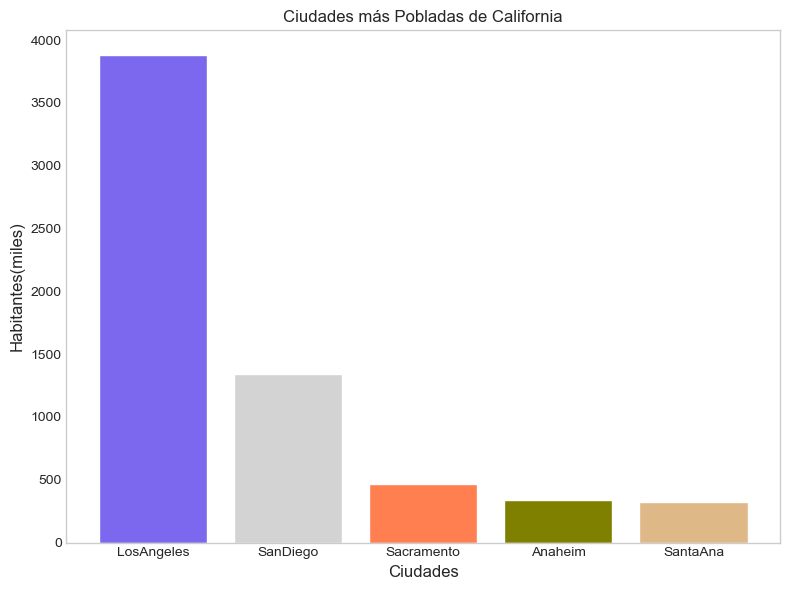

In [31]:
#1 Grafico de barras 

#Eje y: poblacion en orden descendente
df_sorted = df.sort_values(by='population_total', ascending=False) #eje y

#Eje x: las 5 ciudades mas pobladas
top_5_cities = df_sorted.head(5) #eje x

# Ejes X y Y: extraer solo los valores necesarios
eje_x = top_5_cities['city']  # Nombres de las ciudades
eje_y = top_5_cities['population_total']/1000  # Poblaciones

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.bar(eje_x, eje_y, \
        color = ['mediumslateblue','lightgray','coral','olive','burlywood'],
       edgecolor = 'white')

# Personalización del gráfico
plt.title('Ciudades más Pobladas de California',size = 12)
plt.ylabel('Habitantes(miles)', fontsize=12)
plt.xlabel('Ciudades', fontsize=12)

#Elimino la grilla 
plt.grid(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

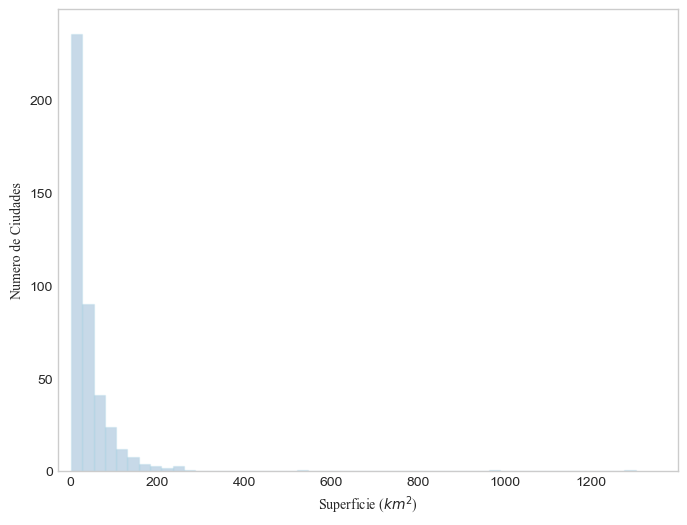

In [32]:
#2 Histograma

# Ordenar el DataFrame por area en orden descendente 
area_data = df['area_total_km2']

# Crear el histograma
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.hist(area_data, 
         bins = 50,
         color='steelblue',
         edgecolor ='lightblue',
         alpha=0.3, 
         label='Plot Area');

#Personalizo el grafico
plt.ylabel('Numero de Ciudades',font = 'Times New Roman');
plt.xlabel('Superficie ($km^{2}$)', font = 'Times New Roman');
plt.xlim(-30,1399)
plt.ylim(-0,249)

#Elimino la grilla 
plt.grid(False)

'ax = axs[1, 0]\noutliers_x = df[df[\'population_total\'] > 1000000].area_water_km2\noutliers_y = df[df[\'population_total\'] > 1000000].population_total / 1000\nax.scatter(outliers_x, outliers_y, color=\'g\', alpha=0.5)\nflecha = {"arrowstyle": "->", "connectionstyle": "angle3"}\nfor i, (ox, oy) in enumerate(zip(outliers_x, outliers_y)):\n    ax.annotate(f"Outlier", xy=(ox, oy), xytext=(ox + 50, oy + 200), arrowprops=flecha)\nax.set_xlim(-5, 139)\nax.set_ylim(-200, 4200)\nax.set_xlabel(\'Área de Agua en la ciudad (km²)\')\nax.set_ylabel(\'Población (miles de habitantes)\')\nax.set_title(\'Población por kilómetro cuadrado de agua\', size=12)\nax.grid(False)\nax.scatter()'

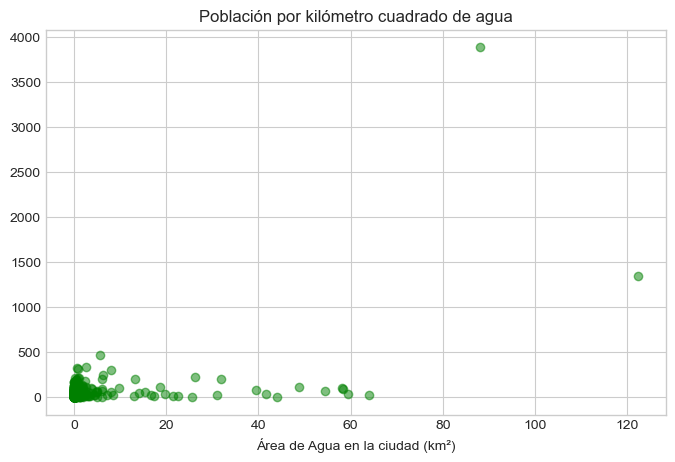

In [63]:
# 3. Scatterplot (posición (1, 0))
df["area_water_km2"]
plt.figure(figsize = (8,5))
plt.scatter(df["area_water_km2"],
            df["population_total"]/1000,
            alpha=0.5,
            color='g'
           )
plt.xlabel('Área de Agua en la ciudad (km²)')
plt.title('Población por kilómetro cuadrado de agua', size=12)

outlier_1_y = df.population_total.nlargest(2).iloc[0]
outlier_1_y = df.population_total.nlargest(2).iloc[1]

'''ax = axs[1, 0]
outliers_x = df[df['population_total'] > 1000000].area_water_km2
outliers_y = df[df['population_total'] > 1000000].population_total / 1000
ax.scatter(outliers_x, outliers_y, color='g', alpha=0.5)
flecha = {"arrowstyle": "->", "connectionstyle": "angle3"}
for i, (ox, oy) in enumerate(zip(outliers_x, outliers_y)):
    ax.annotate(f"Outlier", xy=(ox, oy), xytext=(ox + 50, oy + 200), arrowprops=flecha)
ax.set_xlim(-5, 139)
ax.set_ylim(-200, 4200)
ax.set_xlabel('Área de Agua en la ciudad (km²)')
ax.set_ylabel('Población (miles de habitantes)')
ax.set_title('Población por kilómetro cuadrado de agua', size=12)
ax.grid(False)
ax.scatter()'''


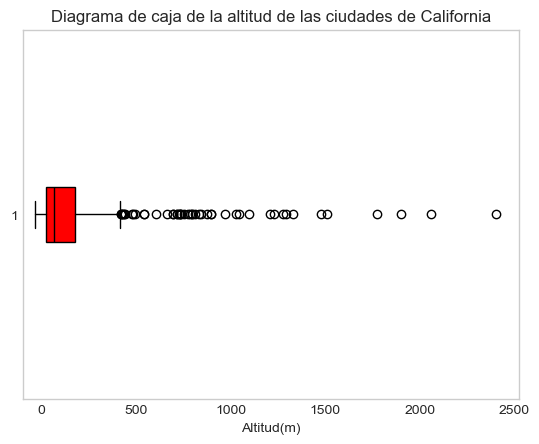

In [37]:
#4 Boxplot
altitud = df.elevation_m
plt.boxplot(altitud, 
            whis = 1.5, 
            vert = False, 
            sym = 'o',
            patch_artist=True, 
           boxprops = {'color':'black', 'facecolor':'red'},
           whiskerprops = {'color':'black'},
           flierprops = {'color':'black'},
           medianprops= {'color':'black'},
            meanprops= {'color':'black'}
           );
plt.title('Diagrama de caja de la altitud de las ciudades de California', size = 12)
plt.xlabel('Altitud(m)')
plt.xlim(-100)
plt.grid(False)
plt.show()

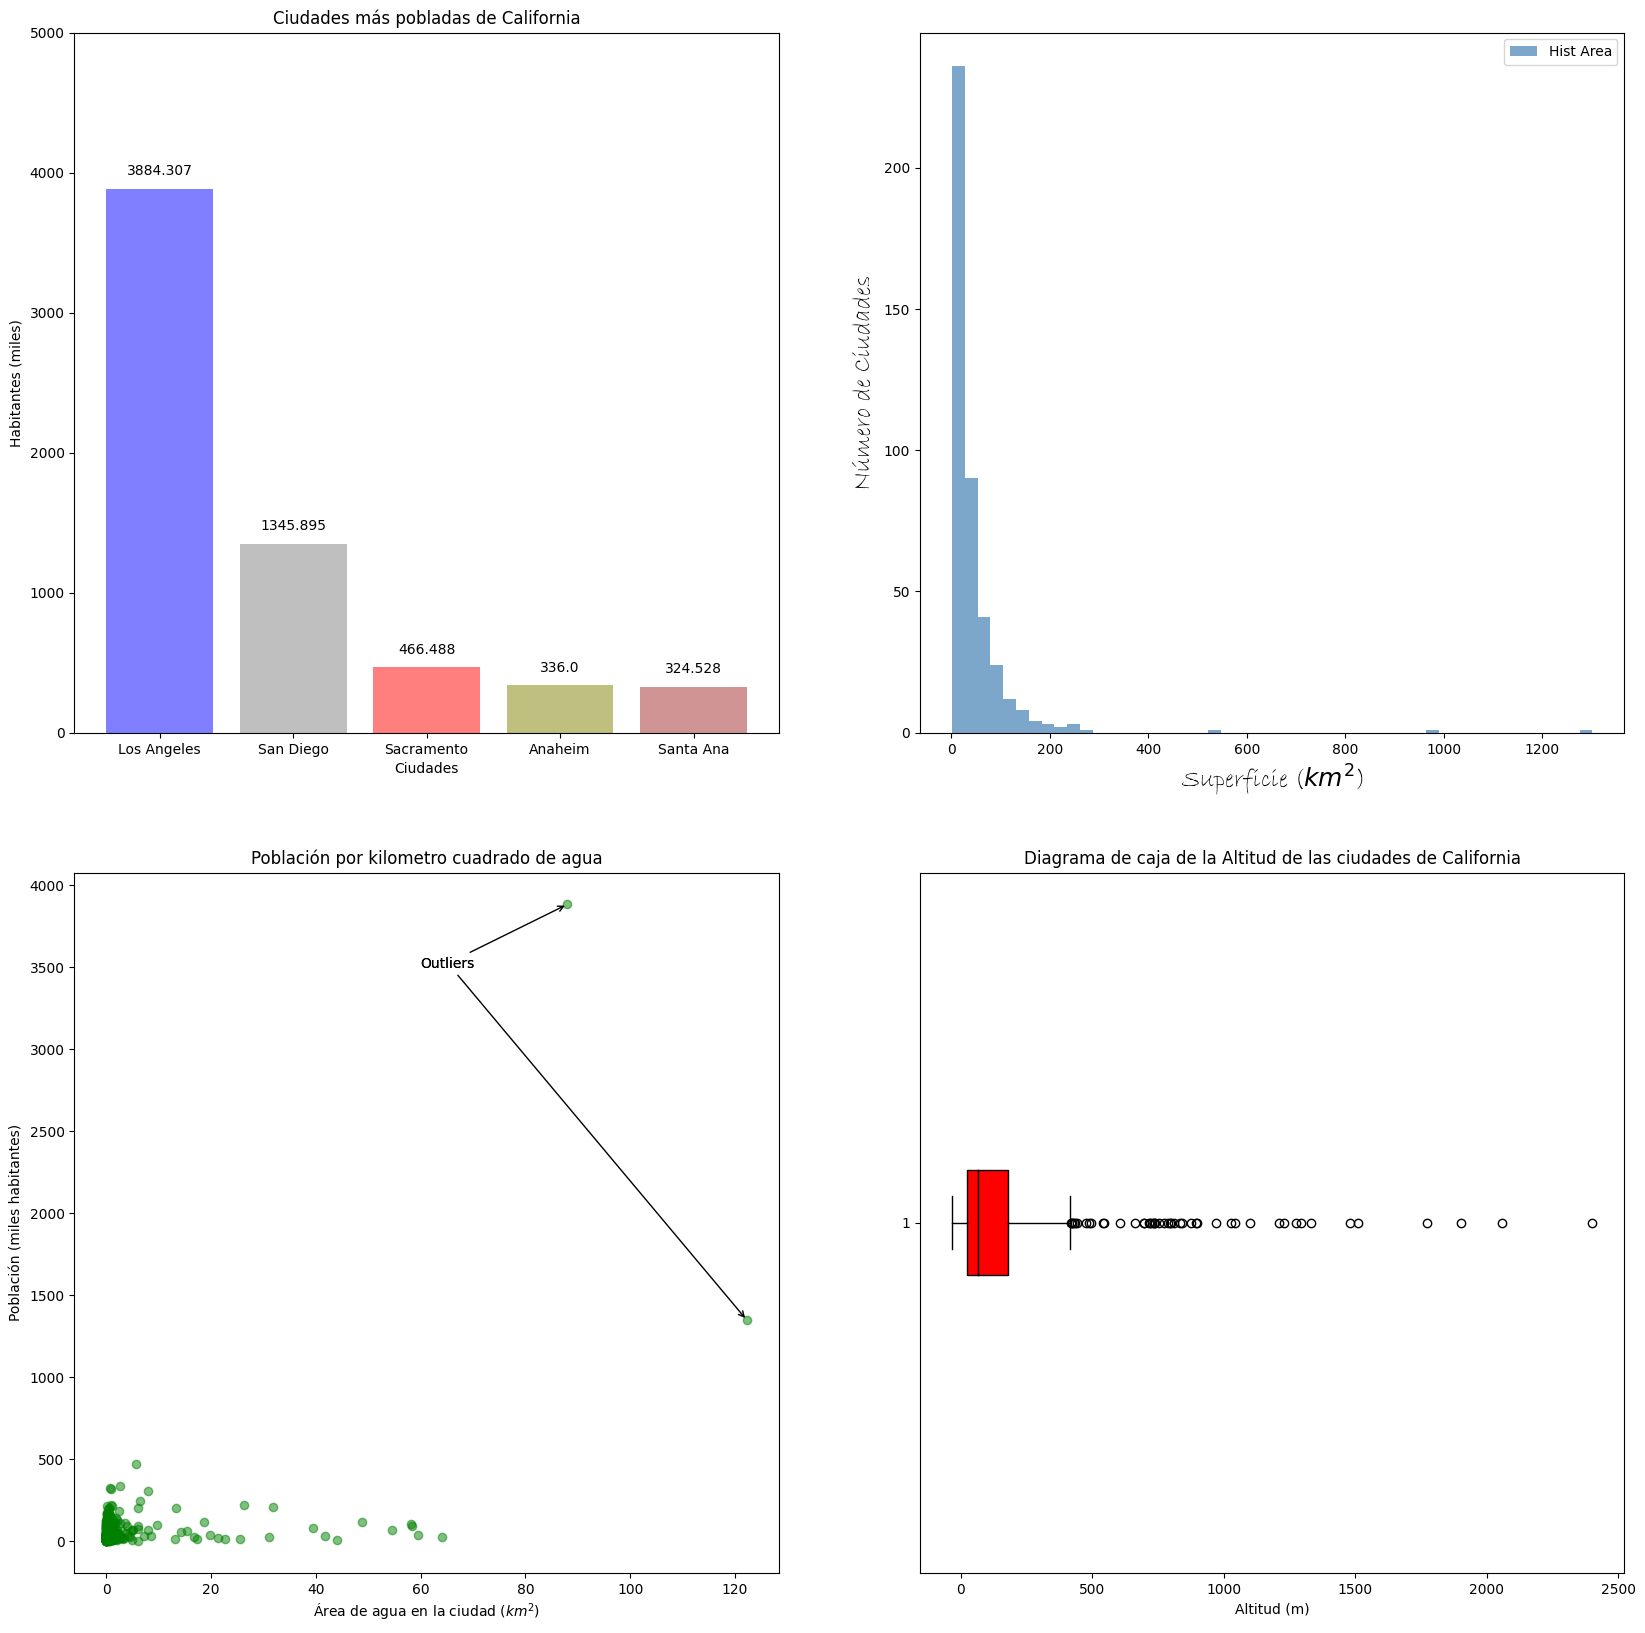

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [31]:
fig.savefig("./mi_practica_obligatorio.jpg")